#CRÉDITOS

#DATASET (KAGGLE): https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset (empresa de serviço financeiro LendingClub)

In [1]:
#Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import xgboost
from xgboost import XGBClassifier
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# ANÁLISE EXPLORATÓRIA // TRATATIVA DOS DADOS

In [2]:
loan = pd.read_csv('loan.csv')
loan.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Dicionários para tradução das variáveis em pt-br & números

traducao_colunas = {
    'id': 'id_emprestimo',
    'member_id': 'id_membro',
    'loan_amnt': 'valor_emprestimo',
    'funded_amnt': 'montante_financiado',
    'funded_amnt_inv': 'montante_finvestidores',
    'term': 'prazo_emprestimo_meses',
    'int_rate': 'taxa_juros',
    'installment': 'parcela_mensal',
    'grade': 'grau_risco_emprestimo',
    'sub_grade': 'subgrau_risco_emprestimo',
    'emp_title': 'titulo_emprego',
    'emp_length': 'tempo_emprego',
    'home_ownership': 'situacao_residencial',
    'annual_inc': 'renda_anual',
    'verification_status': 'status_verificacao',
    'issue_d': 'data_emissao',
    'loan_status': 'status_emprestimo',
    'pymnt_plan': 'plano_pagamento',
    'url': 'url_pagina_emprestimo',
    'desc': 'descricao_emprestimo',
    'purpose': 'finalidade',
    'title': 'finalidade_informada',
    'zip_code': 'codigo_postal',
    'addr_state': 'estado',
    'dti': 'indice_endividamento_mensal',
    'delinq_2yrs': 'inadimplencia_2_anos',
    'earliest_cr_line': 'data_abertura_primeira_linha_credito',
    'inq_last_6mths': 'consultas_ultimos_6_meses',
    'mths_since_last_delinq': 'meses_desde_ultima_inadimplencia',
    'mths_since_last_record': 'meses_desde_ultimo_registro_publico',
    'open_acc': 'linhas_credito_abertas',
    'pub_rec': 'registros_publicos_negativos',
    'revol_bal': 'saldo_rotativo',
    'revol_util': 'taxa_utilizacao_credito_rotativo',
    'total_acc': 'total_linhas_credito',
    'initial_list_status': 'status_inicial_listagem',
    'out_prncp': 'saldo_principal_pendente',
    'out_prncp_inv': 'saldo_principal_pendente_investido',
    'total_pymnt': 'pagamentos_recebidos_ate_data',
    'total_pymnt_inv': 'pagamentos_recebidos_ate_data_investidores',
    'total_rec_int': 'juros_recebidos_ate_data',
    'total_rec_late_fee': 'taxas_atraso_recebidas_ate_data',
    'total_rec_prncp': 'principal_recebido_ate_data',
    'recoveries': 'recuperacoes',
    'collection_recovery_fee': 'taxa_recuperacao_cobranca',
    'last_pymnt_d': 'data_ultimo_pagamento',
    'last_pymnt_amnt': 'valor_ultimo_pagamento',
    'next_pymnt_d': 'data_proximo_pagamento',
    'last_credit_pull_d': 'data_ultima_verificacao_credito',
    'collections_12_mths_ex_med': 'cobrancas_12_meses_ex_medicas',
    'mths_since_last_major_derog': 'meses_desde_ultima_classificacao_risco_grave',
    'policy_code': 'codigo_politica',
    'application_type': 'tipo_aplicacao',
    'annual_inc_joint': 'renda_anual_conjunta',
    'dti_joint': 'indice_endividamento_mensal_conjuge',
    'verification_status_joint': 'status_verificacao_conjuge',
    'acc_now_delinq': 'contas_atraso_atuais',
    'tot_coll_amt': 'montante_total_cobrancas_devidas',
    'tot_cur_bal': 'saldo_atual_total_contas',
    'open_acc_6m': 'operacoes_abertas_ultimos_6_meses',
    'open_il_6m': 'operacoes_parcelamento_ativas_atuais',
    'open_il_12m': 'contas_parcelamento_abertas_ultimos_12_meses',
    'open_il_24m': 'contas_parcelamento_abertas_ultimos_24_meses',
    'mths_since_rcnt_il': 'meses_desde_abertura_contas_parcelamento_mais_recentes',
    'total_bal_il': 'saldo_atual_total_contas_parcelamento',
    'il_util': 'razao_saldo_limite_credito_contas_parcelamento',
    'open_rv_12m': 'operacoes_credito_rotativo_abertas_ultimos_12_meses',
    'open_rv_24m': 'operacoes_credito_rotativo_abertas_ultimos_24_meses',
    'max_bal_bc': 'saldo_maximo_atual_contas_credito_rotativo',
    'all_util': 'saldo_relacao_limite_credito_operacoes',
    'inq_fi': 'consultas_financas_pessoais',
    'total_cu_tl': 'operacoes_financas_totais',
    'inq_last_12m': 'consultas_credito_ultimos_12_meses'
}

traducao_status_emprestimo = {
    'Current': 'Atual',
    'Fully Paid': 'Totalmente Pago',
    'Charged Off': 'Inadimplente',
    'Late (31-120 days)': 'Atrasado (31-120 dias)',
    'Issued': 'Emitido',
    'In Grace Period': 'Em Período de Carência',
    'Late (16-30 days)': 'Atrasado (16-30 dias)',
    'Does not meet the credit policy. Status:Fully Paid': 'Não atende à política de crédito',
    'Default': 'Inadimplente',
    'Does not meet the credit policy. Status:Charged Off': 'Não atende à política de crédito'
}

traducao_prazo_emprestimos_meses = {
    ' 36 months': 36,
    ' 60 months': 60
}

traducao_grau_risco = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

# traducao_subgrau_risco = {
#     'A1': 11,
#     'A2': 12,
#     'A3': 13,
#     'A4': 14,
#     'A5': 15,
#     'B1': 21,
#     'B2': 22,
#     'B3': 23,
#     'B4': 24,
#     'B5': 25,
#     'C1': 31,
#     'C2': 32,
#     'C3': 33,
#     'C4': 34,
#     'C5': 35,
#     'D1': 41,
#     'D2': 42,
#     'D3': 43,
#     'D4': 44,
#     'D5': 45,
#     'E1': 51,
#     'E2': 52,
#     'E3': 53,
#     'E4': 54,
#     'E5': 55,
#     'F1': 61,
#     'F2': 62,
#     'F3': 63,
#     'F4': 64,
#     'F5': 65,
#     'G1': 71,
#     'G2': 72,
#     'G3': 73,
#     'G4': 74,
#     'G5': 75
# }

traducao_finalidade = {
    'debt_consolidation': 'Consolidação de Dívidas',
    'credit_card': 'Cartão de Crédito',
    'home_improvement': 'Melhoria da Casa',
    'other': 'Outro',
    'major_purchase': 'Compra Importante',
    'small_business': 'Pequeno Negócio',
    'car': 'Carro',
    'medical': 'Despesas Médicas',
    'moving': 'Mudança',
    'vacation': 'Férias',
    'house': 'Casa',
    'wedding': 'Casamento',
    'renewable_energy': 'Energia Renovável',
    'educational': 'Educação'
}

traducao_situacao_residencial = {
    'RENT': 'Aluguel',
    'OWN': 'Casa Própria',
    'MORTGAGE': 'Hipotéca',
    'OTHER': 'Outro',
    'NONE': 'Nenhuma',
    'ANY': 'Qualquer'
}

In [4]:
# Aplicando mapeamento

loan.columns = loan.columns.map(traducao_colunas)
loan['status_emprestimo'] = loan['status_emprestimo'].map(traducao_status_emprestimo)
loan['prazo_emprestimo_meses'] = loan['prazo_emprestimo_meses'].map(traducao_prazo_emprestimos_meses)
loan['grau_risco_emprestimo'] = loan['grau_risco_emprestimo'].map(traducao_grau_risco)
# loan['subgrau_risco_emprestimo'] = loan['subgrau_risco_emprestimo'].map(traducao_subgrau_risco)
loan['finalidade'] = loan['finalidade'].map(traducao_finalidade)
loan['situacao_residencial'] = loan['situacao_residencial'].map(traducao_situacao_residencial)

In [5]:
loan.head(2)

,id_emprestimo,id_membro,valor_emprestimo,montante_financiado,montante_finvestidores,prazo_emprestimo_meses,taxa_juros,parcela_mensal,grau_risco_emprestimo,subgrau_risco_emprestimo,titulo_emprego,tempo_emprego,situacao_residencial,renda_anual,status_verificacao,data_emissao,status_emprestimo,plano_pagamento,url_pagina_emprestimo,descricao_emprestimo,finalidade,finalidade_informada,codigo_postal,estado,indice_endividamento_mensal,inadimplencia_2_anos,data_abertura_primeira_linha_credito,consultas_ultimos_6_meses,meses_desde_ultima_inadimplencia,meses_desde_ultimo_registro_publico,linhas_credito_abertas,registros_publicos_negativos,saldo_rotativo,taxa_utilizacao_credito_rotativo,total_linhas_credito,status_inicial_listagem,saldo_principal_pendente,saldo_principal_pendente_investido,pagamentos_recebidos_ate_data,pagamentos_recebidos_ate_data_investidores,principal_recebido_ate_data,juros_recebidos_ate_data,taxas_atraso_recebidas_ate_data,recuperacoes,taxa_recuperacao_cobranca,data_ultimo_pagamento,valor_ultimo_pagamento,data_proximo_pagamento,data_ultima_verificacao_credito,cobrancas_12_meses_ex_medicas,meses_desde_ultima_classificacao_risco_grave,codigo_politica,tipo_aplicacao,renda_anual_conjunta,indice_endividamento_mensal_conjuge,status_verificacao_conjuge,contas_atraso_atuais,montante_total_cobrancas_devidas,saldo_atual_total_contas,operacoes_abertas_ultimos_6_meses,operacoes_parcelamento_ativas_atuais,contas_parcelamento_abertas_ultimos_12_meses,contas_parcelamento_abertas_ultimos_24_meses,meses_desde_abertura_contas_parcelamento_mais_recentes,saldo_atual_total_contas_parcelamento,razao_saldo_limite_credito_contas_parcelamento,operacoes_credito_rotativo_abertas_ultimos_12_meses,operacoes_credito_rotativo_abertas_ultimos_24_meses,saldo_maximo_atual_contas_credito_rotativo,saldo_relacao_limite_credito_operacoes,NaN,consultas_financas_pessoais,operacoes_financas_totais,consultas_credito_ultimos_12_meses
0,1077501,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,2,B2,NaN,10+ years,Aluguel,24000.0,Verified,Dec-2011,Totalmente Pago,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,Cartão de Crédito,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,3,C4,Ryder,< 1 year,Aluguel,30000.0,Source Verified,Dec-2011,Inadimplente,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,Carro,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EXPLORAÇÃO GŔAFICA

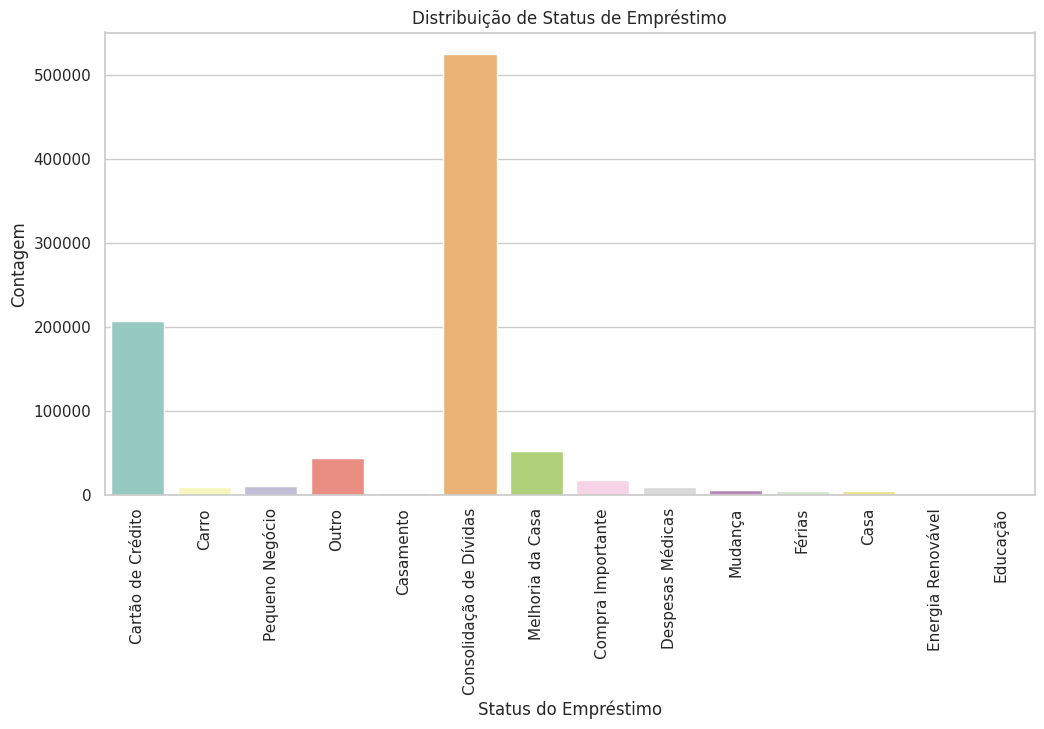

In [6]:
# Finalidade

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(data=loan, x="finalidade", palette="Set3")

plt.title("Distribuição de Status de Empréstimo")
plt.xlabel("Status do Empréstimo")
plt.ylabel("Contagem")
plt.xticks(rotation=90)
plt.show()

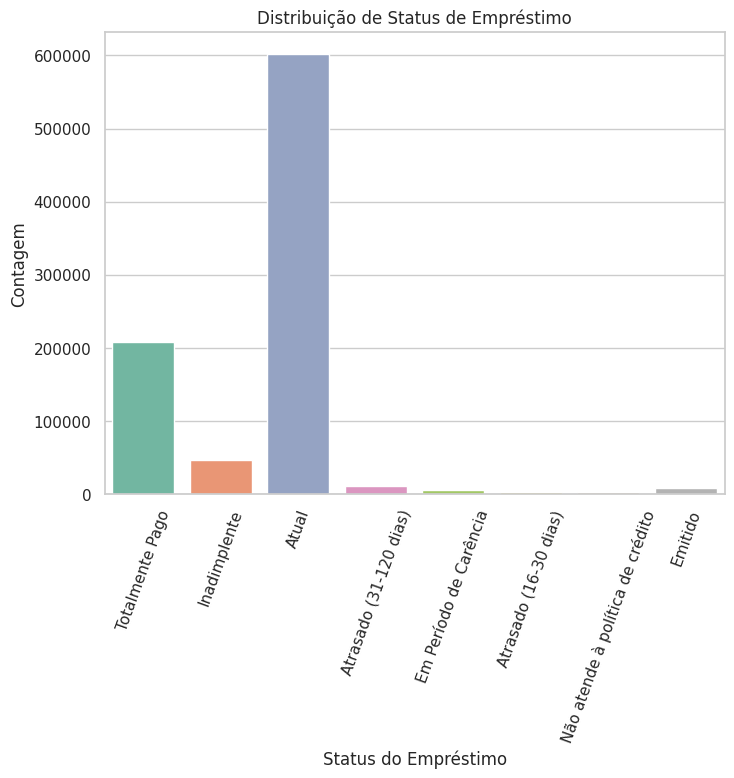

In [7]:
# Status de pagamento

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(data=loan, x="status_emprestimo", palette="Set2")

plt.title("Distribuição de Status de Empréstimo")
plt.xlabel("Status do Empréstimo")
plt.ylabel("Contagem")
plt.xticks(rotation=70)
plt.show()


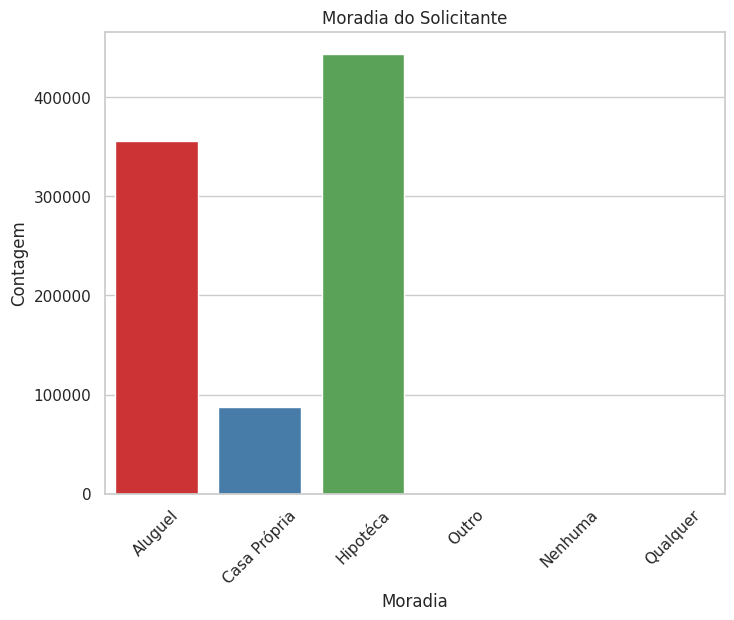

In [8]:
# Moradia

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(data=loan, x="situacao_residencial", palette="Set1")

plt.title("Moradia do Solicitante")
plt.xlabel("Moradia")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.show()

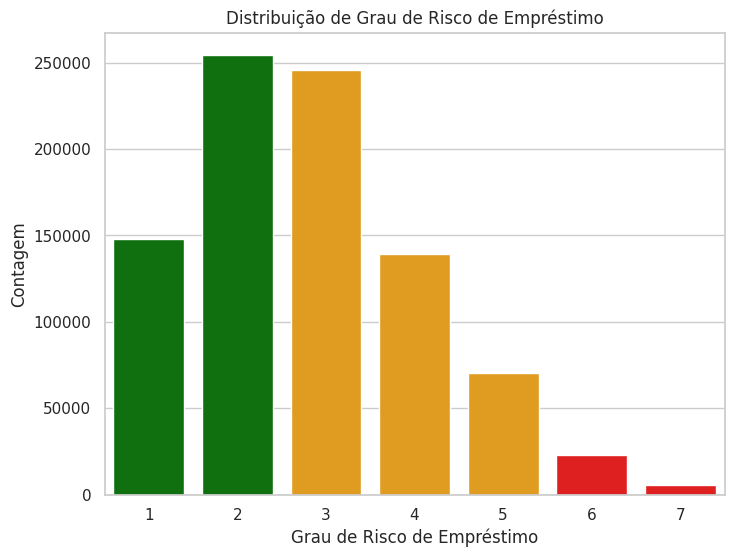

In [9]:
# Grau de Risco

cores_hex_risco = ['#008000', '#008000', '#FFA500', '#FFA500', '#FFA500', '#FF0000', '#FF0000']
custom_palette = sns.color_palette(cores_hex_risco)

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(data=loan, x="grau_risco_emprestimo", palette=custom_palette)
plt.title("Distribuição de Grau de Risco de Empréstimo")
plt.xlabel("Grau de Risco de Empréstimo")
plt.ylabel("Contagem")
plt.show()


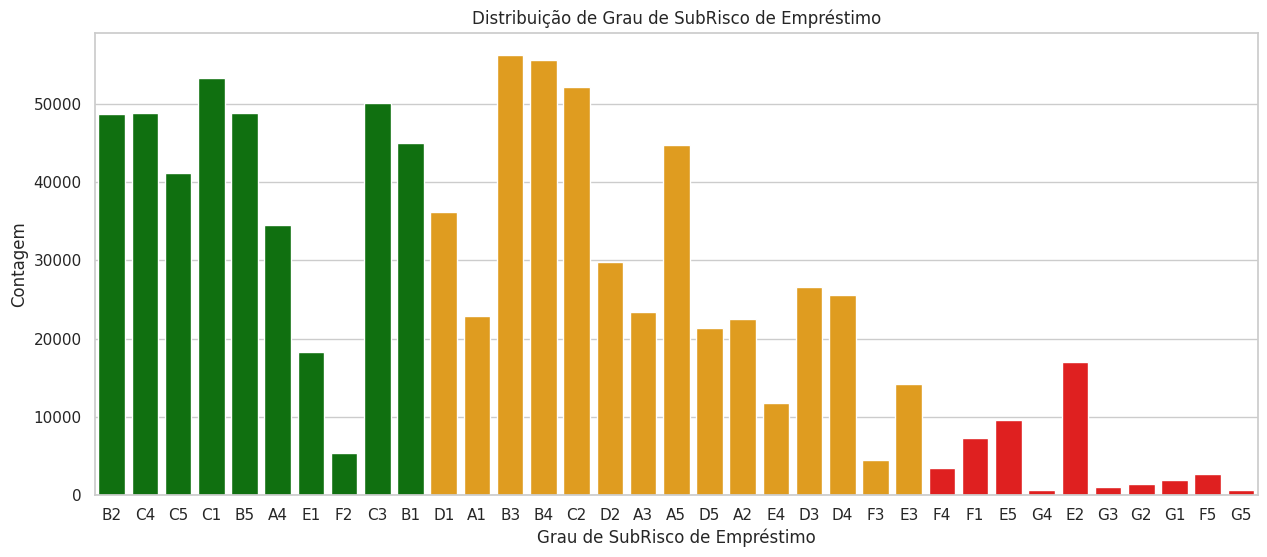

In [10]:
# Subgrau de risco

cores_hex_subrisco = ['#008000', '#008000', '#008000', '#008000', '#008000',
             '#008000', '#008000', '#008000', '#008000', '#008000', 
             '#FFA500', '#FFA500', '#FFA500', '#FFA500', '#FFA500',
             '#FFA500', '#FFA500', '#FFA500', '#FFA500', '#FFA500',
             '#FFA500', '#FFA500', '#FFA500', '#FFA500', '#FFA500', 
             '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000',
             '#FF0000', '#FF0000', '#FF0000', '#FF0000', '#FF0000',]
custom_palette = sns.color_palette(cores_hex_subrisco)

plt.figure(figsize=(15, 6))
sns.set(style="whitegrid")
sns.countplot(data=loan, x="subgrau_risco_emprestimo", palette=custom_palette)
plt.title("Distribuição de Grau de SubRisco de Empréstimo")
plt.xlabel("Grau de SubRisco de Empréstimo")
plt.ylabel("Contagem")
plt.show()


In [11]:
loan = loan.drop(columns=['id_emprestimo', 'id_membro' , 'operacoes_credito_rotativo_abertas_ultimos_24_meses', 'url_pagina_emprestimo', 'titulo_emprego', 'descricao_emprestimo',
                   'codigo_postal', 'estado', 'meses_desde_ultimo_registro_publico', 'status_inicial_listagem', 'codigo_politica', 'montante_total_cobrancas_devidas',
                   'saldo_atual_total_contas', 'operacoes_abertas_ultimos_6_meses', 'operacoes_parcelamento_ativas_atuais', 'contas_parcelamento_abertas_ultimos_12_meses',
                   'contas_parcelamento_abertas_ultimos_24_meses', 'meses_desde_abertura_contas_parcelamento_mais_recentes', 'saldo_atual_total_contas_parcelamento',
                   'razao_saldo_limite_credito_contas_parcelamento', 'operacoes_credito_rotativo_abertas_ultimos_12_meses', 'saldo_maximo_atual_contas_credito_rotativo',
                   'saldo_relacao_limite_credito_operacoes','consultas_financas_pessoais', 'operacoes_financas_totais', 'consultas_credito_ultimos_12_meses'])
loan = loan.dropna(axis=1)

In [12]:
loan.head(2)

,valor_emprestimo,montante_financiado,montante_finvestidores,prazo_emprestimo_meses,taxa_juros,parcela_mensal,grau_risco_emprestimo,subgrau_risco_emprestimo,situacao_residencial,status_verificacao,data_emissao,status_emprestimo,plano_pagamento,finalidade,indice_endividamento_mensal,saldo_rotativo,saldo_principal_pendente,saldo_principal_pendente_investido,pagamentos_recebidos_ate_data,pagamentos_recebidos_ate_data_investidores,principal_recebido_ate_data,juros_recebidos_ate_data,taxas_atraso_recebidas_ate_data,recuperacoes,taxa_recuperacao_cobranca,valor_ultimo_pagamento,tipo_aplicacao
0,5000.0,5000.0,4975.0,36,10.65,162.87,2,B2,Aluguel,Verified,Dec-2011,Totalmente Pago,n,Cartão de Crédito,27.65,13648.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,INDIVIDUAL
1,2500.0,2500.0,2500.0,60,15.27,59.83,3,C4,Aluguel,Source Verified,Dec-2011,Inadimplente,n,Carro,1.00,1687.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,INDIVIDUAL


In [13]:
object_col = loan.select_dtypes(include=['object'])
object_col

,subgrau_risco_emprestimo,situacao_residencial,status_verificacao,data_emissao,status_emprestimo,plano_pagamento,finalidade,tipo_aplicacao
0,B2,Aluguel,Verified,Dec-2011,Totalmente Pago,n,Cartão de Crédito,INDIVIDUAL
1,C4,Aluguel,Source Verified,Dec-2011,Inadimplente,n,Carro,INDIVIDUAL
2,C5,Aluguel,Not Verified,Dec-2011,Totalmente Pago,n,Pequeno Negócio,INDIVIDUAL
3,C1,Aluguel,Source Verified,Dec-2011,Totalmente Pago,n,Outro,INDIVIDUAL
4,B5,Aluguel,Source Verified,Dec-2011,Atual,n,Outro,INDIVIDUAL
...,...,...,...,...,...,...,...,...
887374,B5,Aluguel,Verified,Jan-2015,Atual,n,Consolidação de Dívidas,INDIVIDUAL
887375,B5,Hipotéca,Verified,Jan-2015,Atual,n,Melhoria da Casa,INDIVIDUAL
887376,D2,Aluguel,Verified,Jan-2015,Atual,n,Consolidação de Dívidas,INDIVIDUAL
887377,E3,Aluguel,Source Verified,Jan-2015,Atual,n,Consolidação de Dívidas,INDIVIDUAL


# DEFININDO VARIÁVEIS (KMeans)

In [14]:
#Explorando tipo das colunas

def colunas_tipos(dataset):
    int_col = len(dataset.select_dtypes('int').columns)
    float_col = len(dataset.select_dtypes('float').columns)
    object_col = len(dataset.select_dtypes('object').columns)
    print('Temos {} int, {} float e {} object nos tipos de dados das colunas'.format(int_col, float_col, object_col-1))

colunas_tipos(loan)

Temos 2 int, 17 float e 7 object nos tipos de dados das colunas


In [15]:
#Separando variáveis quantitativas das qualitativas

loan_quantitativo = loan.select_dtypes(include=['int', 'float'])

loan_qualitativo = loan.select_dtypes(include=['object'])

In [16]:
#Normalizando valores (valores - média dividido pelo desvio padrão)

loan_normalizado = (loan_quantitativo - loan_quantitativo.mean()) / loan_quantitativo.std()
loan_normalizado.columns = loan_normalizado.columns.astype(str)
loan_normalizado = loan_normalizado.fillna(loan_normalizado.mean())

loan_quantitativo = pd.concat([loan_quantitativo.reset_index(drop=True), loan['status_emprestimo']], axis=1)

In [17]:
num_clusters = 8


x = loan_quantitativo['status_emprestimo']
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
loan_quantitativo['cluster'] = kmeans.fit_predict(loan_normalizado)


In [18]:
loan_quantitativo['cluster'].value_counts()

1    290421
3    146977
0    135357
4    132185
7     91930
2     43286
6     42359
5      4864
Name: cluster, dtype: int64

In [19]:
cluster_principal = loan_quantitativo[loan_quantitativo['cluster'] == 2]

# INICIANDO MODELO (XGBOOST)

In [21]:
### EXCLUIR VARIÁVEIS QUE NÃO SERÃO UTILIZADAS, E AO FINAL DE TUDO CALCULAR TAMBÉM A MARGEM DE LUCRO QUE O ALGORITMO PODE PREVER (TIPO: SE LIBERARMOS R$X.000,00 DE CRÉDITO O RETORNO SERA R$Y.000,00)